# Star Wars Survey
Data from [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). Based on the Dataquest *Star Wars Survey* guided project.

In [264]:
# Set up the environment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [265]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Data Cleaning

In [266]:
# Remove rows where RespondentID is NaN
star_wars = star_wars[star_wars["RespondentID"].notnull()]

Convert Yes/No columns to Booleans.

In [267]:
# Convert the yes-no questions columns to Boolean
# Create a dict
yes_no = {'Yes':True, 'No':False}
# Loop through columns with Yes/No questions
for c in star_wars.columns[[1,2,30,31,32]]:
    # Replace values in columns according to dict
    star_wars[c] = star_wars[c].map(yes_no)
    # Replace missing values with False
    star_wars[c].fillna(False, inplace=True)

Clean and rename "Have you seen episode X" columns.

In [268]:
# Dict: map movie title to True
title_dict = {"Star Wars: Episode I  The Phantom Menace":True,
          "Star Wars: Episode II  Attack of the Clones":True,
          "Star Wars: Episode III  Revenge of the Sith":True,
          "Star Wars: Episode IV  A New Hope":True,
          "Star Wars: Episode V The Empire Strikes Back":True,
          "Star Wars: Episode VI Return of the Jedi":True}
# Loop through "have you seen episode x" columns
for c in star_wars.columns[3:9]:
    # Replace movie titles with True
    star_wars[c] = star_wars[c].map(titles)
    # Replace missing values with False
    star_wars[c].fillna(False, inplace=True)
# 'have you seen episode x' columns
new_column_names = {"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
                    "Unnamed: 4":"seen_2",
                    "Unnamed: 5":"seen_3",
                    "Unnamed: 6":"seen_4",
                    "Unnamed: 7":"seen_5",
                    "Unnamed: 8":"seen_6"}
# Rename columns according to dict
star_wars = star_wars.rename(columns=new_column_names)

Convert and rename "Rank episode X" columns.

In [269]:
# Convert columns 9 through 15 to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# 'rank episode x' columns
new_column_names2 = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
                     "Unnamed: 10":"ranking_2",
                     "Unnamed: 11":"ranking_3",
                     "Unnamed: 12":"ranking_4",
                     "Unnamed: 13":"ranking_5",
                     "Unnamed: 14":"ranking_6"}
# Rename columns
star_wars = star_wars.rename(columns=new_column_names2)

Clean, rename and convert "Rank character X" columns.

In [270]:
# 'rank character x' columns
new_column_names3 = {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo",
                     "Unnamed: 16":"Luke Skywalker",
                     "Unnamed: 17":"Princess Leia Organa",
                     "Unnamed: 18":"Anakin Skywalker",
                     "Unnamed: 19":"Obi Wan Kenobi",
                     "Unnamed: 20":"Emperor Palpatine",
                     "Unnamed: 21":"Darth Vader",
                     "Unnamed: 22":"Lando Calrissian",
                     "Unnamed: 23":"Boba Fett",
                     "Unnamed: 24":"C-3P0",
                     "Unnamed: 25":"R2 D2",
                     "Unnamed: 26":"Jar Jar Binks",
                     "Unnamed: 27":"Padme Amidala",
                     "Unnamed: 28":"Yoda"}
# Rename columns
star_wars = star_wars.rename(columns=new_column_names3)
# Possible answers for the columns
character_dict = {"Very unfavorably":1,
                  "Somewhat unfavorably":2,
                  "Neither favorably nor unfavorably (neutral)":3,
                  "Somewhat favorably":4,
                  "Very favorably":5,
                  "Unfamiliar (N/A)":None}
# Loop through the columns
for c in star_wars.columns[15:29]:
    # Change the values accoridng to character_dict
    star_wars[c] = star_wars[c].map(character_dict)
    # Fill missing values with None
    star_wars[c].fillna("NaN", inplace=True)
# Convert the columns to numeric
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].astype(float)

In this section, we've successfully cleaned most of the data. Namely, we have:
* Removed rows (actually, the only row) where RespondentID was NaN, as this is the unique identifier for each row
* Mapped the answers to Yes/No questions to True/False, including missing answers (considered as "No")
* Renamed columns to make the dataset easier to navigate
* Mapped the character rankings to a 1-5 scale

# Views vs. Rankings
Compare the views and rankings for each movie.

In [271]:
# Find the average ranking for each movie
rankings = 6 - star_wars[star_wars.columns[9:15]].mean() # 6 - x because 6 is lowest rank in original set

# Sum the views for each movie
views = star_wars[star_wars.columns[3:9]].sum()

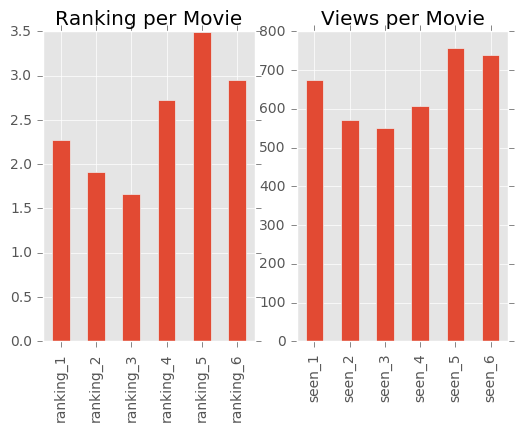

In [272]:
# Figure instance
fig = plt.figure()

# First subplot
ax1 = fig.add_subplot(1,2,1)
# Plot the ranking
rankings.plot(kind="bar")
ax1.set_title("Ranking per Movie")

# Second subplot
ax2 = fig.add_subplot(1,2,2)
# Plot the views
views.plot(kind="bar")
ax2.set_title("Views per Movie")



plt.show()

After computing the views per movie and computing+reversing the rankings per movie, we displayed both on a single plt.Figure instance.

Views and rankings per movie seem to be tightly correlated; the pattern is very similar for both attributes, with the exception of episode 1 having been viewed slightly more often than episode 4 but ranking nearly a whole point lower. It is well-known that movies 1-3 were disappointing for Star Wars fans; this explains the decreasing views they obtained.

# Splitting the Dataset
Split the dataset on the Age column and repeat the Views vs. Ranking analysis.

In [273]:
# Possible values in Age column
print(star_wars["Age"].unique())
# Value counts
star_wars["Age"].value_counts()

[u'18-29' nan u'30-44' u'> 60' u'45-60']


45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [274]:
# Replace NaN values with most common value: 45-60
star_wars["Age"].fillna("45-60", inplace=True)

In [275]:
# Split the data into age groups
age_split = {}
for value in star_wars["Age"].unique():
    age_split[value] = (star_wars[star_wars["Age"] == value])

The data is split according to age. Find the average ranking and the number of views per movie per age group.

In [276]:
age_rankings = {}
age_views = {}
# Loop through the keys in age_split
for key in age_split:
    # Assign the value for each key to df
    df = age_split[key]
    # Compute the average rankings for df and assign to age_averages[key]
    age_rankings[key] = 6 - df[df.columns[9:15]].mean()
    # Sum the views for df and assign to age_views[key]
    age_views[key] = df[df.columns[3:9]].sum()

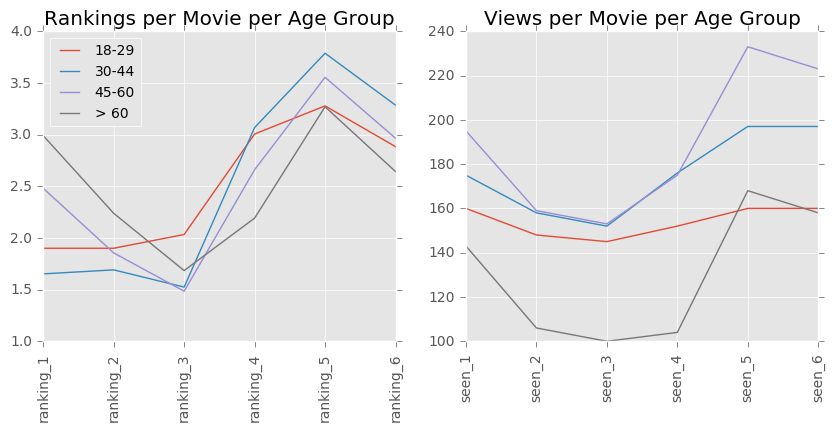

In [277]:
# Figure instance
fig = plt.figure(figsize=(10,4))

# First subplot
ax1 = fig.add_subplot(1,2,1)
age_rankings["18-29"].plot()
age_rankings["30-44"].plot()
age_rankings["45-60"].plot()
age_rankings["> 60"].plot()
plt.xticks(rotation=90)
plt.title("Rankings per Movie per Age Group")
# Set legend
plt.legend(labels=["18-29","30-44","45-60","> 60"], loc=2, fontsize=10)

# Second subplot
ax2 = fig.add_subplot(1,2,2)
age_views["18-29"].plot()
age_views["30-44"].plot()
age_views["45-60"].plot()
age_views["> 60"].plot()
plt.title("Views per Movie per Age Group")
plt.xticks(rotation=90)

plt.show()

DISCUSS RESULTS. DISCUSS >60 AGE GROUP.

# Next Steps
* Try to segment the data by columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
* Which character is the most liked?
* Which character is the most disliked?
* Which character creates the most controversy? (split between dislikes and likes)